<a href="https://colab.research.google.com/github/Robbysaidiii/-Web-Deployment-using-Flask/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Your_Name.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [14]:
#Type your code here
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [23]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/hasil_clustering.csv')
# Menghapus kolom yang tidak diperlukan
df = df.drop(columns=['TransactionID_TX000001', 'TransactionID_TX000002', 'PreviousTransactionDate_2024-11-04 08:12:15'])
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionID_TX000003,TransactionID_TX000004,TransactionID_TX000005,TransactionID_TX000006,TransactionID_TX000007,...,PreviousTransactionDate_2024-11-04 08:12:14,PreviousTransactionDate_2024-11-04 08:12:16,PreviousTransactionDate_2024-11-04 08:12:17,PreviousTransactionDate_2024-11-04 08:12:18,PreviousTransactionDate_2024-11-04 08:12:19,PreviousTransactionDate_2024-11-04 08:12:20,PreviousTransactionDate_2024-11-04 08:12:21,PreviousTransactionDate_2024-11-04 08:12:22,PreviousTransactionDate_2024-11-04 08:12:23,Cluster
0,0.182136,0.608888,0.244828,0.0,0.336832,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
1,0.182800,0.608126,0.451724,0.0,0.918055,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
2,0.182342,0.589460,0.158621,0.0,0.068637,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,3
3,0.182449,0.592126,0.051724,0.0,0.569198,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,3
4,0.182135,0.592126,0.648276,0.0,0.492591,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,4


In [24]:
X = df.drop(columns=['Cluster'])  # Fitur
y = df['Cluster']

In [25]:

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [26]:
x= df.iloc[:,:-1].values
y= df.iloc[:,-1].values
#Type your code here

In [27]:
x_train, x_test,y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=4)
print('Train set',x_train.shape, y_train.shape)
print('Test set',x_test.shape, y_test.shape)

Train set (2009, 7306) (2009,)
Test set (503, 7306) (503,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [28]:
k = 4
model_knn = KNeighborsClassifier(n_neighbors= k)
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [29]:
y_pred = model_knn.predict(x_test)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [30]:
# Prediksi data uji menggunakan model terbaik
y_pred_test = model_knn.predict(x_test)

# Menampilkan hasil prediksi
print("Hasil prediksi untuk data uji:")
print(y_pred_test)

Hasil prediksi untuk data uji:
[4 0 1 0 1 3 0 1 3 1 1 0 3 0 0 0 0 0 0 0 2 4 3 1 3 4 1 0 3 1 3 1 1 0 1 0 0
 1 1 0 0 3 1 3 3 3 0 1 1 3 3 3 1 3 3 1 0 3 3 3 3 0 1 1 2 1 0 0 1 0 0 2 1 3
 1 0 1 1 3 1 3 3 2 0 1 4 0 0 0 0 1 0 3 1 1 1 0 1 3 0 1 0 0 1 0 0 1 1 0 0 0
 2 2 0 3 1 1 0 1 3 1 0 0 3 4 2 2 2 3 4 0 3 1 0 2 0 3 3 1 0 1 0 0 3 1 0 1 1
 2 3 1 0 0 3 0 1 3 1 0 4 0 0 3 1 3 1 0 0 0 1 0 3 3 2 0 0 3 1 1 1 3 0 3 3 3
 0 3 1 1 3 1 1 1 1 0 3 1 3 3 0 1 1 3 0 3 1 1 1 0 0 0 0 1 1 0 3 4 1 3 0 3 1
 0 3 1 0 0 1 0 0 0 1 3 1 0 0 3 0 1 2 3 0 3 3 3 1 0 4 0 0 1 0 1 3 4 1 1 3 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 0 3 0 0 0 1 0 1 0 2 3 1 1 0 0 1 0 1 0 2 0 3 0 3
 1 3 1 0 1 0 1 3 1 3 1 0 3 1 1 1 1 0 3 1 1 1 1 3 0 2 3 3 4 3 3 1 1 1 3 3 3
 4 3 0 3 0 0 0 1 1 1 4 0 0 3 3 1 0 1 0 3 1 3 3 1 1 3 1 2 1 4 0 0 1 0 1 3 1
 1 2 0 2 0 3 1 3 0 4 0 1 0 3 3 3 1 3 3 0 3 4 3 4 0 1 0 1 1 1 1 3 1 3 3 0 1
 1 2 3 0 0 3 1 1 3 0 1 0 1 0 2 2 3 1 1 1 3 3 0 0 0 1 0 1 3 0 0 1 0 0 4 0 0
 1 1 3 1 1 1 3 0 0 1 3 0 0 0 1 4 0 3 1 1 1 3 1 3 1 2 1 3 0 1 3 0 3 0 

In [31]:
accuracy = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test, average='weighted') # Specify average for multiclass
precision = precision_score(y_test, y_pred_test, average='weighted') # Specify average for multiclass
recall = recall_score(y_test, y_pred_test, average='weighted') # Specify average for multiclass

# Menampilkan hasil
print("Accuracy:", accuracy)
print("F1-Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7455268389662028
F1-Score: 0.7022947661905832
Precision: 0.6777398859935486
Recall: 0.7455268389662028


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


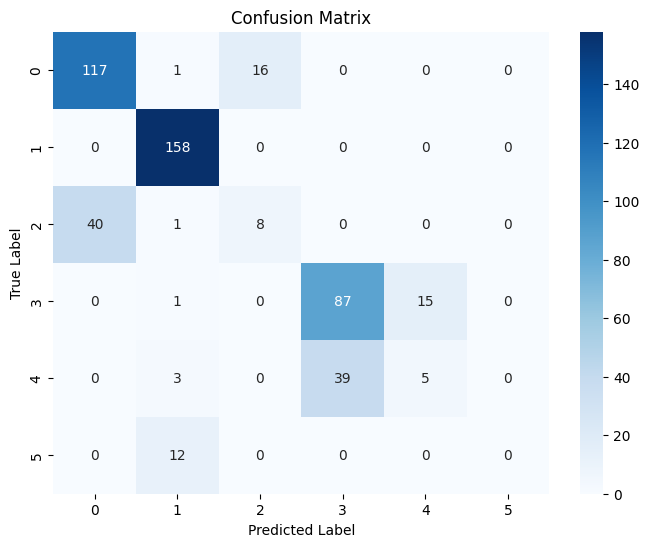

              precision    recall  f1-score   support

           0       0.75      0.87      0.80       134
           1       0.90      1.00      0.95       158
           2       0.33      0.16      0.22        49
           3       0.69      0.84      0.76       103
           4       0.25      0.11      0.15        47
           5       0.00      0.00      0.00        12

    accuracy                           0.75       503
   macro avg       0.49      0.50      0.48       503
weighted avg       0.68      0.75      0.70       503



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [32]:
# Prediksi data uji
y_pred = model_knn.predict(x_test)  # Changed model to model_knn and X_test to x_test

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi pakai heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy: 1.0


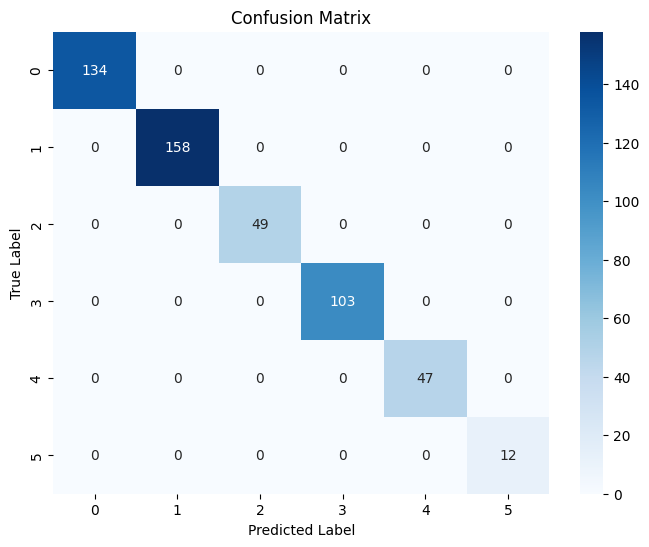

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       158
           2       1.00      1.00      1.00        49
           3       1.00      1.00      1.00       103
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        12

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503



In [35]:

# Buat dictionary hyperparameter yang ingin diuji
param_grid = {
    'max_depth': [5, 10, 15, 20, None],  # Coba berbagai kedalaman pohon
    'min_samples_split': [2, 10, 20, 50],  # Berapa minimal sampel sebelum split
    'min_samples_leaf': [1, 5, 10, 20],  # Minimal sampel di setiap leaf
    'criterion': ['gini', 'entropy'],  # Metode pemilihan split
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Scale ONLY the training data
scaler = StandardScaler() # If you want to redefine the scaler for this specific part
x_train_scaled = scaler.fit_transform(x_train) # Fit and transform on x_train

# Jalankan GridSearchCV using the scaled training data
grid_search.fit(x_train_scaled, y_train)

# Tampilkan hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Gunakan model terbaik untuk prediksi
best_model = grid_search.best_estimator_

# Scale the test data using the same scaler used for training data
x_test_scaled = scaler.transform(x_test)
y_pred = best_model.predict(x_test_scaled)

# Evaluasi model dengan confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.